In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,456,Cabo Verde,2007,Developing,126.0,0,5.28,345.463714,96.0,0,...,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,72.3
1,462,Cabo Verde,2001,Developing,152.0,0,3.81,150.743486,92.0,0,...,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,73.0
2,2172,Saint Lucia,2011,Developing,143.0,0,10.43,0.000000,99.0,0,...,7.58,99.0,0.1,1766.947595,1386542.0,4.3,4.3,0.733,12.9,74.6
3,2667,Tunisia,2013,Developing,13.0,3,1.29,594.645310,98.0,16,...,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,74.9
4,381,Brunei Darussalam,2002,Developing,95.0,0,0.13,941.703687,99.0,0,...,3.40,94.0,0.1,16846.219800,1386542.0,6.7,6.1,0.820,13.3,74.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2350 non-null   int64  
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Adult Mortality                  2350 non-null   float64
 5   infant deaths                    2350 non-null   int64  
 6   Alcohol                          2350 non-null   float64
 7   percentage expenditure           2350 non-null   float64
 8   Hepatitis B                      2350 non-null   float64
 9   Measles                          2350 non-null   int64  
 10   BMI                             2350 non-null   float64
 11  under-five deaths                2350 non-null   int64  
 12  Polio               

In [4]:
df = df.drop_duplicates()
df.describe(include=['object'])

,Country,Status
count,2350,2350
unique,191,2
top,Botswana,Developing
freq,16,1935


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df['Status'] = df['Status'].map({'Developed':1, 'Developing':0}).astype(int)
df['Status'].head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64

In [7]:
valores_unicos = df['Country'].unique()
valores_unicos

array(['Cabo Verde', 'Saint Lucia', 'Tunisia', 'Brunei Darussalam',
       'Equatorial Guinea', 'Papua New Guinea', 'Ecuador', 'Mongolia',
       'Poland', 'Oman', 'Senegal', 'Kuwait', 'Sierra Leone',
       'Saudi Arabia', 'India', 'Chad', 'Guinea-Bissau', 'Mauritius',
       'Ghana', 'Solomon Islands', 'Ireland', 'Israel', 'Fiji',
       'Uzbekistan', 'France', 'Malaysia', 'Singapore', "Côte d'Ivoire",
       'El Salvador', 'Belarus', 'Luxembourg', 'Armenia', 'Turkmenistan',
       'Bahamas', 'Belgium', 'Nicaragua', 'Lesotho',
       'Iran (Islamic Republic of)', 'Dominican Republic', 'Liberia',
       'Serbia', 'Denmark', 'Netherlands', 'Kyrgyzstan', 'Slovenia',
       'Kazakhstan', 'Azerbaijan', 'Nepal', 'Montenegro',
       'Democratic Republic of the Congo', 'Mali',
       'United Kingdom of Great Britain and Northern Ireland',
       'Bolivia (Plurinational State of)', 'South Sudan', 'Finland',
       'Cyprus', 'Uruguay', 'Belize', 'United Republic of Tanzania',
       'Madagasc

In [8]:
countries_by_continent = {
    'Cabo Verde': 'Africa', 'Saint Lucia': 'North America', 'Tunisia': 'Africa', 'Brunei Darussalam': 'Asia',
    'Equatorial Guinea': 'Africa', 'Papua New Guinea': 'Oceania', 'Ecuador': 'South America', 'Mongolia': 'Asia',
    'Poland': 'Europe', 'Oman': 'Asia', 'Senegal': 'Africa', 'Kuwait': 'Asia', 'Sierra Leone': 'Africa',
    'Saudi Arabia': 'Asia', 'India': 'Asia', 'Chad': 'Africa', 'Guinea-Bissau': 'Africa', 'Mauritius': 'Africa',
    'Ghana': 'Africa', 'Solomon Islands': 'Oceania', 'Ireland': 'Europe', 'Israel': 'Asia', 'Fiji': 'Oceania',
    'Uzbekistan': 'Asia', 'France': 'Europe', 'Malaysia': 'Asia', 'Singapore': 'Asia', "Côte d'Ivoire": 'Africa',
    'El Salvador': 'North America', 'Belarus': 'Europe', 'Luxembourg': 'Europe', 'Armenia': 'Asia', 'Turkmenistan': 'Asia',
    'Bahamas': 'North America', 'Belgium': 'Europe', 'Nicaragua': 'North America', 'Lesotho': 'Africa',
    'Iran (Islamic Republic of)': 'Asia', 'Dominican Republic': 'North America', 'Liberia': 'Africa',
    'Serbia': 'Europe', 'Denmark': 'Europe', 'Netherlands': 'Europe', 'Kyrgyzstan': 'Asia', 'Slovenia': 'Europe',
    'Kazakhstan': 'Asia', 'Azerbaijan': 'Asia', 'Nepal': 'Asia', 'Montenegro': 'Europe',
    'Democratic Republic of the Congo': 'Africa', 'Mali': 'Africa', 'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Bolivia (Plurinational State of)': 'South America', 'South Sudan': 'Africa', 'Finland': 'Europe',
    'Cyprus': 'Asia', 'Uruguay': 'South America', 'Belize': 'North America', 'United Republic of Tanzania': 'Africa',
    'Madagascar': 'Africa', "Lao People's Democratic Republic": 'Asia', 'Bahrain': 'Asia', 'Ukraine': 'Europe',
    'Sweden': 'Europe', 'Kenya': 'Africa', 'Micronesia (Federated States of)': 'Oceania', 'Cuba': 'North America',
    'Cameroon': 'Africa', 'Gambia': 'Africa', 'Somalia': 'Africa', 'Pakistan': 'Asia', 'Malawi': 'Africa',
    'Yemen': 'Asia', 'Tajikistan': 'Asia', 'Mozambique': 'Africa', 'Jamaica': 'North America', 'Namibia': 'Africa',
    'Spain': 'Europe', 'Tonga': 'Oceania', 'Peru': 'South America', 'Botswana': 'Africa', 'Mexico': 'North America',
    'Sao Tome and Principe': 'Africa', 'Croatia': 'Europe', 'Malta': 'Europe', 'Switzerland': 'Europe', 'Honduras': 'North America',
    'Venezuela (Bolivarian Republic of)': 'South America', 'Uganda': 'Africa', 'Congo': 'Africa', 'Germany': 'Europe',
    'Georgia': 'Asia', 'Norway': 'Europe', 'Swaziland': 'Africa', 'Chile': 'South America', 'Slovakia': 'Europe', 'Iceland': 'Europe',
    'Brazil': 'South America', 'Barbados': 'North America', 'Myanmar': 'Asia', 'Guatemala': 'North America', 'Marshall Islands': 'Oceania',
    'Angola': 'Africa', 'Mauritania': 'Africa', 'China': 'Asia', 'Seychelles': 'Africa', 'Eritrea': 'Africa',
    'Morocco': 'Africa', "Democratic People's Republic of Korea": 'Asia', 'Burundi': 'Africa', 'Antigua and Barbuda': 'North America',
    'Timor-Leste': 'Asia', 'Djibouti': 'Africa', 'Romania': 'Europe', 'Nigeria': 'Africa', 'Benin': 'Africa',
    'The former Yugoslav republic of Macedonia': 'Europe', 'Egypt': 'Africa', 'Comoros': 'Africa', 'Zimbabwe': 'Africa',
    'Trinidad and Tobago': 'North America', 'Canada': 'North America', 'Central African Republic': 'Africa', 'Lithuania': 'Europe',
    'Sudan': 'Africa', 'Costa Rica': 'North America', 'Republic of Moldova': 'Europe', 'Lebanon': 'Asia', 'Qatar': 'Asia',
    'Sri Lanka': 'Asia', 'United Arab Emirates': 'Asia', 'Indonesia': 'Asia', 'Saint Vincent and the Grenadines': 'North America',
    'Panama': 'North America', 'Albania': 'Europe', 'Paraguay': 'South America', 'Rwanda': 'Africa', 'Republic of Korea': 'Asia',
    'Haiti': 'North America', 'Iraq': 'Asia', 'Bhutan': 'Asia', 'Colombia': 'South America', 'Turkey': 'Asia',
    'Philippines': 'Asia', 'Guinea': 'Africa', 'Grenada': 'North America', 'Maldives': 'Asia', 'Gabon': 'Africa',
    'New Zealand': 'Oceania', 'Samoa': 'Oceania', 'South Africa': 'Africa', 'Niue': 'Oceania', 'Latvia': 'Europe',
    'Australia': 'Oceania', 'Burkina Faso': 'Africa', 'Libya': 'Africa', 'Bosnia and Herzegovina': 'Europe', 'Kiribati': 'Oceania',
    'Argentina': 'South America', 'Cambodia': 'Asia', 'Vanuatu': 'Oceania', 'Zambia': 'Africa', 'Japan': 'Asia',
    'Guyana': 'South America', 'Afghanistan': 'Asia', 'Suriname': 'South America', 'Thailand': 'Asia', 'Bangladesh': 'Asia',
    'Greece': 'Europe', 'Austria': 'Europe', 'Ethiopia': 'Africa', 'Togo': 'Africa', 'Czechia': 'Europe', 'Niger': 'Africa',
    'Italy': 'Europe', 'Hungary': 'Europe', 'Estonia': 'Europe', 'Viet Nam': 'Asia', 'Jordan': 'Asia', 'Russian Federation': 'Asia',
    'Syrian Arab Republic': 'Asia', 'United States of America': 'North America', 'Portugal': 'Europe', 'Bulgaria': 'Europe',
    'Saint Kitts and Nevis': 'North America', 'Algeria': 'Africa', 'Nauru': 'Oceania', 'Cook Islands': 'Oceania', 'Palau': 'Oceania',
    'Monaco': 'Europe', 'Dominica': 'North America'
}


df['region']= df['Country'].map(countries_by_continent)
df = df.drop(columns=['Country'])

In [9]:
df.head()

,Unnamed: 0,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,region
0,456,2007,0,126.0,0,5.28,345.463714,96.0,0,25.5,...,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,72.3,Africa
1,462,2001,0,152.0,0,3.81,150.743486,92.0,0,22.1,...,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,73.0,Africa
2,2172,2011,0,143.0,0,10.43,0.000000,99.0,0,44.5,...,99.0,0.1,1766.947595,1386542.0,4.3,4.3,0.733,12.9,74.6,North America
3,2667,2013,0,13.0,3,1.29,594.645310,98.0,16,59.3,...,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,74.9,Africa
4,381,2002,0,95.0,0,0.13,941.703687,99.0,0,28.0,...,94.0,0.1,16846.219800,1386542.0,6.7,6.1,0.820,13.3,74.8,Asia


In [10]:
valores_unicos = df['region'].unique()
valores_unicos

array(['Africa', 'North America', 'Asia', 'Oceania', 'South America',
       'Europe'], dtype=object)

In [11]:
df['region'].isnull().sum()

0

In [12]:
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=False, dtype= 'int')


print(df_encoded[['region_Africa', 'region_North America', 'region_Asia', 'region_Oceania', 'region_South America']].head())

   region_Africa  region_North America  region_Asia  region_Oceania  \
0              1                     0            0               0   
1              1                     0            0               0   
2              0                     1            0               0   
3              1                     0            0               0   
4              0                     0            1               0   

   region_South America  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


In [13]:
df_encoded 

,Unnamed: 0,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,region_Africa,region_Asia,region_Europe,region_North America,region_Oceania,region_South America
0,456,2007,0,126.0,0,5.28,345.463714,96.0,0,25.5,...,8.0,0.602,11.9,72.3,1,0,0,0,0,0
1,462,2001,0,152.0,0,3.81,150.743486,92.0,0,22.1,...,9.3,0.562,11.0,73.0,1,0,0,0,0,0
2,2172,2011,0,143.0,0,10.43,0.000000,99.0,0,44.5,...,4.3,0.733,12.9,74.6,0,0,0,1,0,0
3,2667,2013,0,13.0,3,1.29,594.645310,98.0,16,59.3,...,6.3,0.720,14.7,74.9,1,0,0,0,0,0
4,381,2002,0,95.0,0,0.13,941.703687,99.0,0,28.0,...,6.1,0.820,13.3,74.8,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,1638,2011,1,59.0,0,6.91,3601.287457,82.0,3,68.0,...,0.7,0.826,14.8,87.0,0,0,1,0,0,0
2346,1095,2010,0,287.0,4,3.21,53.307827,83.0,26,23.1,...,7.9,0.405,8.9,56.7,1,0,0,0,0,0
2347,1130,2007,0,266.0,17,6.08,56.778587,92.0,0,4.7,...,4.2,0.458,8.4,61.8,0,0,0,1,0,0
2348,1294,2003,1,72.0,2,9.30,3519.258515,95.0,10982,57.0,...,0.5,0.841,15.4,79.9,0,0,1,0,0,0


In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2350 non-null   int64  
 1   Year                             2350 non-null   int64  
 2   Status                           2350 non-null   int64  
 3   Adult Mortality                  2350 non-null   float64
 4   infant deaths                    2350 non-null   int64  
 5   Alcohol                          2350 non-null   float64
 6   percentage expenditure           2350 non-null   float64
 7   Hepatitis B                      2350 non-null   float64
 8   Measles                          2350 non-null   int64  
 9   BMI                              2350 non-null   float64
 10  under-five deaths                2350 non-null   int64  
 11  Polio                            2350 non-null   float64
 12  Total expenditure   

<Axes: >

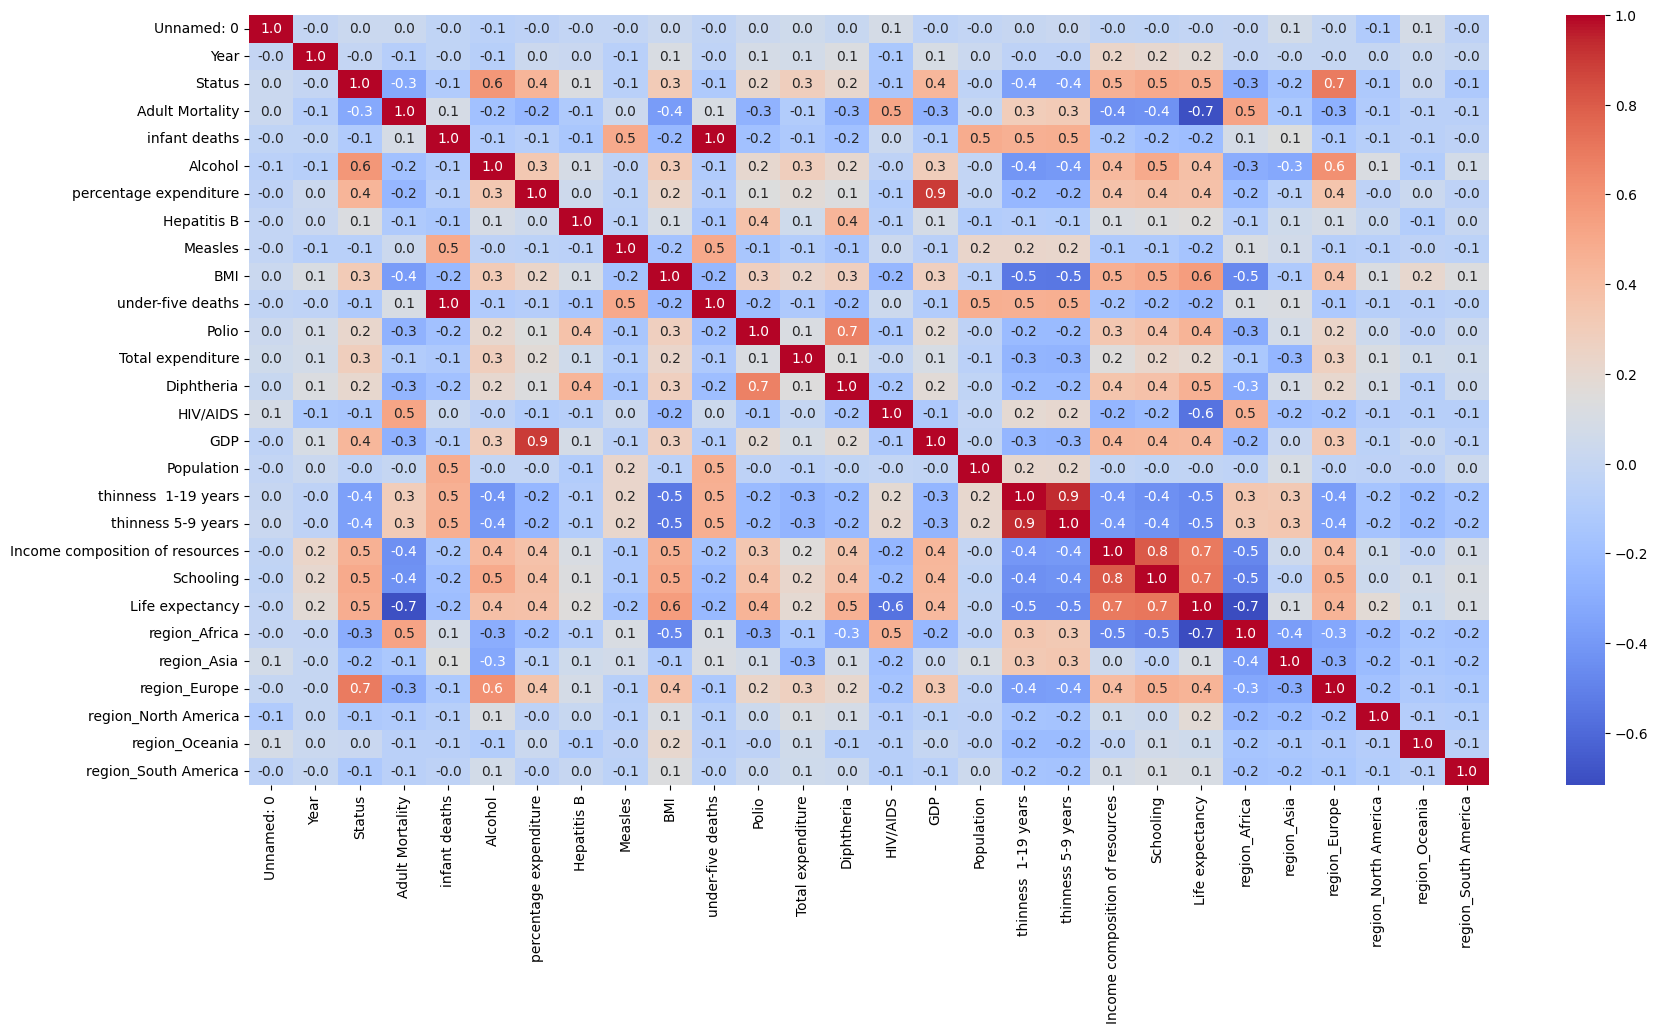

In [15]:
corr = df_encoded.corr()
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')

In [16]:
df_encoded.head()

,Unnamed: 0,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,region_Africa,region_Asia,region_Europe,region_North America,region_Oceania,region_South America
0,456,2007,0,126.0,0,5.28,345.463714,96.0,0,25.5,...,8.0,0.602,11.9,72.3,1,0,0,0,0,0
1,462,2001,0,152.0,0,3.81,150.743486,92.0,0,22.1,...,9.3,0.562,11.0,73.0,1,0,0,0,0,0
2,2172,2011,0,143.0,0,10.43,0.000000,99.0,0,44.5,...,4.3,0.733,12.9,74.6,0,0,0,1,0,0
3,2667,2013,0,13.0,3,1.29,594.645310,98.0,16,59.3,...,6.3,0.720,14.7,74.9,1,0,0,0,0,0
4,381,2002,0,95.0,0,0.13,941.703687,99.0,0,28.0,...,6.1,0.820,13.3,74.8,0,1,0,0,0,0


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
"""
X=df_encoded.drop(columns=['Life expectancy'])
y=df_encoded['Life expectancy']

vif_data = pd.DataFrame()
vif_data['df_encoded'] = X.columns
vif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
"""

"\nX=df_encoded.drop(columns=['Life expectancy'])\ny=df_encoded['Life expectancy']\n\nvif_data = pd.DataFrame()\nvif_data['df_encoded'] = X.columns\nvif_data['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\n\nprint(vif_data)\n"

In [18]:
X=df_encoded.drop(columns=['Life expectancy'])
y=df_encoded['Life expectancy']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


elastic_net_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)  
elastic_net_reg.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_reg.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

print(f'ElasticNet MSE: {mse_elastic_net}')

ElasticNet MSE: 15.698755395820765


/home/reboot-student/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.778e+04, tolerance: 1.712e+01
  model = cd_fast.enet_coordinate_descent(


In [19]:
print(y_train.shape, X_train.shape)

(1880,) (1880, 27)


In [20]:
reg = LinearRegression()
reg.fit(X, y)


LinearRegression()

In [21]:
y_pred = reg.predict(X_test)


mse = mean_squared_error (y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squered: {r_squared}')

Mean Squared Error: 11.818859340379493
R-Squered: 0.87147526241237


In [22]:
mse = mean_squared_error(y_test, y_pred)

# Calcula el RMSE
rmse = np.sqrt(mse)

# Imprime el resultado
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 11.818859340379493
Root Mean Squared Error (RMSE): 3.4378567946293943


In [23]:
X=df_encoded.drop(columns=['Life expectancy'])
y=df_encoded['Life expectancy']


polynomial_regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynomial_regressor.fit(X, y)

y_pred2 = polynomial_regressor.predict(X)

In [24]:
mse2 = mean_squared_error(y, y_pred2)
r_squared2 = r2_score(y, y_pred2)

print(f'Mean Squared Error: {mse2}')
print(f'R-Squared: {r_squared2}')

Mean Squared Error: 9.523972754323745
R-Squared: 0.8956974546603413


In [25]:

mse = mean_squared_error (y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error for LR: {mse}')
print(f'R-Squered for LR: {r_squared}')



mse2 = mean_squared_error(y, y_pred2)
r_squared2 = r2_score(y, y_pred2)

print(f'Mean Squared Error for PR: {mse2}')
print(f'R-Squared for PR: {r_squared2}')


if mse2 < mse and r_squared2 > r_squared:
    print("\n Polynomial Regression (PR) has a better fit and explains the variance better than Linear Regression (LR).")
else:
    print("\n Linear Regression (LR) performs similarly or better than Polynomial Regression (PR).")

Mean Squared Error for LR: 11.818859340379493
R-Squered for LR: 0.87147526241237
Mean Squared Error for PR: 9.523972754323745
R-Squared for PR: 0.8956974546603413

 Polynomial Regression (PR) has a better fit and explains the variance better than Linear Regression (LR).


In [26]:
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()

test = pd.read_csv('test.csv')

test = test.drop_duplicates()
test.describe(include=['object'])

test.columns = test.columns.str.strip()

test['Status'] = test['Status'].map({'Developed':1, 'Developing':0}).astype(int)

countries_by_continent = {
    'Cabo Verde': 'Africa', 'Saint Lucia': 'North America', 'Tunisia': 'Africa', 'Brunei Darussalam': 'Asia',
    'Equatorial Guinea': 'Africa', 'Papua New Guinea': 'Oceania', 'Ecuador': 'South America', 'Mongolia': 'Asia',
    'Poland': 'Europe', 'Oman': 'Asia', 'Senegal': 'Africa', 'Kuwait': 'Asia', 'Sierra Leone': 'Africa',
    'Saudi Arabia': 'Asia', 'India': 'Asia', 'Chad': 'Africa', 'Guinea-Bissau': 'Africa', 'Mauritius': 'Africa',
    'Ghana': 'Africa', 'Solomon Islands': 'Oceania', 'Ireland': 'Europe', 'Israel': 'Asia', 'Fiji': 'Oceania',
    'Uzbekistan': 'Asia', 'France': 'Europe', 'Malaysia': 'Asia', 'Singapore': 'Asia', "Côte d'Ivoire": 'Africa',
    'El Salvador': 'North America', 'Belarus': 'Europe', 'Luxembourg': 'Europe', 'Armenia': 'Asia', 'Turkmenistan': 'Asia',
    'Bahamas': 'North America', 'Belgium': 'Europe', 'Nicaragua': 'North America', 'Lesotho': 'Africa',
    'Iran (Islamic Republic of)': 'Asia', 'Dominican Republic': 'North America', 'Liberia': 'Africa',
    'Serbia': 'Europe', 'Denmark': 'Europe', 'Netherlands': 'Europe', 'Kyrgyzstan': 'Asia', 'Slovenia': 'Europe',
    'Kazakhstan': 'Asia', 'Azerbaijan': 'Asia', 'Nepal': 'Asia', 'Montenegro': 'Europe',
    'Democratic Republic of the Congo': 'Africa', 'Mali': 'Africa', 'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Bolivia (Plurinational State of)': 'South America', 'South Sudan': 'Africa', 'Finland': 'Europe',
    'Cyprus': 'Asia', 'Uruguay': 'South America', 'Belize': 'North America', 'United Republic of Tanzania': 'Africa',
    'Madagascar': 'Africa', "Lao People's Democratic Republic": 'Asia', 'Bahrain': 'Asia', 'Ukraine': 'Europe',
    'Sweden': 'Europe', 'Kenya': 'Africa', 'Micronesia (Federated States of)': 'Oceania', 'Cuba': 'North America',
    'Cameroon': 'Africa', 'Gambia': 'Africa', 'Somalia': 'Africa', 'Pakistan': 'Asia', 'Malawi': 'Africa',
    'Yemen': 'Asia', 'Tajikistan': 'Asia', 'Mozambique': 'Africa', 'Jamaica': 'North America', 'Namibia': 'Africa',
    'Spain': 'Europe', 'Tonga': 'Oceania', 'Peru': 'South America', 'Botswana': 'Africa', 'Mexico': 'North America',
    'Sao Tome and Principe': 'Africa', 'Croatia': 'Europe', 'Malta': 'Europe', 'Switzerland': 'Europe', 'Honduras': 'North America',
    'Venezuela (Bolivarian Republic of)': 'South America', 'Uganda': 'Africa', 'Congo': 'Africa', 'Germany': 'Europe',
    'Georgia': 'Asia', 'Norway': 'Europe', 'Swaziland': 'Africa', 'Chile': 'South America', 'Slovakia': 'Europe', 'Iceland': 'Europe',
    'Brazil': 'South America', 'Barbados': 'North America', 'Myanmar': 'Asia', 'Guatemala': 'North America', 'Marshall Islands': 'Oceania',
    'Angola': 'Africa', 'Mauritania': 'Africa', 'China': 'Asia', 'Seychelles': 'Africa', 'Eritrea': 'Africa',
    'Morocco': 'Africa', "Democratic People's Republic of Korea": 'Asia', 'Burundi': 'Africa', 'Antigua and Barbuda': 'North America',
    'Timor-Leste': 'Asia', 'Djibouti': 'Africa', 'Romania': 'Europe', 'Nigeria': 'Africa', 'Benin': 'Africa',
    'The former Yugoslav republic of Macedonia': 'Europe', 'Egypt': 'Africa', 'Comoros': 'Africa', 'Zimbabwe': 'Africa',
    'Trinidad and Tobago': 'North America', 'Canada': 'North America', 'Central African Republic': 'Africa', 'Lithuania': 'Europe',
    'Sudan': 'Africa', 'Costa Rica': 'North America', 'Republic of Moldova': 'Europe', 'Lebanon': 'Asia', 'Qatar': 'Asia',
    'Sri Lanka': 'Asia', 'United Arab Emirates': 'Asia', 'Indonesia': 'Asia', 'Saint Vincent and the Grenadines': 'North America',
    'Panama': 'North America', 'Albania': 'Europe', 'Paraguay': 'South America', 'Rwanda': 'Africa', 'Republic of Korea': 'Asia',
    'Haiti': 'North America', 'Iraq': 'Asia', 'Bhutan': 'Asia', 'Colombia': 'South America', 'Turkey': 'Asia',
    'Philippines': 'Asia', 'Guinea': 'Africa', 'Grenada': 'North America', 'Maldives': 'Asia', 'Gabon': 'Africa',
    'New Zealand': 'Oceania', 'Samoa': 'Oceania', 'South Africa': 'Africa', 'Niue': 'Oceania', 'Latvia': 'Europe',
    'Australia': 'Oceania', 'Burkina Faso': 'Africa', 'Libya': 'Africa', 'Bosnia and Herzegovina': 'Europe', 'Kiribati': 'Oceania',
    'Argentina': 'South America', 'Cambodia': 'Asia', 'Vanuatu': 'Oceania', 'Zambia': 'Africa', 'Japan': 'Asia',
    'Guyana': 'South America', 'Afghanistan': 'Asia', 'Suriname': 'South America', 'Thailand': 'Asia', 'Bangladesh': 'Asia',
    'Greece': 'Europe', 'Austria': 'Europe', 'Ethiopia': 'Africa', 'Togo': 'Africa', 'Czechia': 'Europe', 'Niger': 'Africa',
    'Italy': 'Europe', 'Hungary': 'Europe', 'Estonia': 'Europe', 'Viet Nam': 'Asia', 'Jordan': 'Asia', 'Russian Federation': 'Asia',
    'Syrian Arab Republic': 'Asia', 'United States of America': 'North America', 'Portugal': 'Europe', 'Bulgaria': 'Europe',
    'Saint Kitts and Nevis': 'North America', 'Algeria': 'Africa', 'Nauru': 'Oceania', 'Cook Islands': 'Oceania', 'Palau': 'Oceania',
    'Monaco': 'Europe', 'Dominica': 'North America'
}


test['region']= test['Country'].map(countries_by_continent)
test = test.drop(columns=['Country'])

test_encoded = pd.get_dummies(test, columns=['region'], drop_first=False, dtype= 'int')

#test_encoded[['region_Africa', 'region_North America', 'region_Asia', 'region_Oceania', 'region_South America']]
test_encoded


,Unnamed: 0,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region_Africa,region_Asia,region_Europe,region_North America,region_Oceania,region_South America
0,2546,2006,0,123.0,8,0.970,122.652333,83.0,517,48.5,...,6.4,6.3,0.636,11.4,0,1,0,0,0,0
1,650,2006,1,113.0,0,11.830,1555.651986,92.0,1,58.1,...,1.8,1.8,0.783,13.9,0,0,1,0,0,0
2,1740,2007,0,125.0,0,4.980,678.518894,9.0,0,57.2,...,2.1,2.2,0.762,13.6,0,0,1,0,0,0
3,177,2014,0,7.0,0,1.570,367.255674,98.0,46,62.9,...,6.1,6.0,0.820,14.5,0,1,0,0,0,0
4,1377,2000,0,428.0,77,1.510,0.681686,92.0,21002,14.4,...,9.2,9.1,0.448,8.4,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,859,2006,0,336.0,7,0.970,10.602698,94.0,128,14.3,...,9.3,9.3,0.405,5.3,1,0,0,0,0,0
584,1405,2004,0,91.0,0,0.020,1731.073528,94.0,23,65.9,...,3.2,3.0,0.791,14.4,0,1,0,0,0,0
585,962,2015,0,262.0,3,3.755,0.000000,97.0,71,27.3,...,7.3,7.2,0.450,8.9,1,0,0,0,0,0
586,2658,2006,0,188.0,0,6.350,103.371069,89.0,0,38.4,...,6.2,6.6,0.751,12.3,0,0,0,1,0,0


In [27]:

y_pred = polynomial_regressor.predict(test_encoded)
y_pred

y_pred.shape, test_encoded.shape

((588,), (588, 27))

In [28]:
print(len(range(1, len(y_pred) + 1)))

588


In [29]:
# prediciendo sobre el test set
print(y_pred2[0:20])
# para descargar en ordenador
def download_output(y_pred, name):
  output = pd.DataFrame({'ID': range(1, len(y_pred)+1),
      'Life expectancy': y_pred})
  output.to_csv(name, index=False)
download_output(y_pred, 'submission.csv')

[70.73103974 67.05699506 74.89391724 75.04595462 73.34854087 57.21886729
 60.09500568 73.88098143 66.19317271 75.99016554 72.14825528 74.70211932
 62.07406199 76.29667411 54.64616079 73.65785409 67.28728417 43.89257235
 67.02542339 52.42771139]
